# Milestone 3

In [101]:
import Cosserat
from Cosserat import cosserat_rod
import numpy as np
from matplotlib import pyplot as plt

# for updates
import importlib
importlib.reload(Cosserat)

'''Define rod'''
tot_length = 3
n_elements = 30
n_nodes = n_elements + 1

element_length = tot_length/n_elements
r_o = np.vstack((np.zeros((2,n_nodes)),np.arange(0.0, tot_length+element_length / 2.0, element_length)))

Q_o = np.zeros((3, 3, n_elements))
L = r_o[:, 1:] - r_o[:, :-1]
L_norm = np.linalg.norm(L, axis=0, keepdims=True)
Q_o[2] = L/L_norm
Q_o[1] = [[0]*n_elements, [1]*n_elements, [0]*n_elements]
Q_o[0] = np.cross(Q_o[1], Q_o[2], axis = 0)

I = np.zeros(3,)
I[0:2] = 0.25 * np.pi * rad**4
I[2] = 0.5 * np.pi * rad**4

v_o = np.zeros((3, n_nodes))
w_o = np.zeros((3, n_elements))
rad = 0.25
rho = 5E3
E = 1E6
G = 1E4
lock_e = False

force = -15
ext_force = np.zeros((3, n_nodes))
ext_force[0, -1] = force
ext_couples = np.zeros((3, n_elements))
beam_case = cosserat_rod(r_o, Q_o, v_o, w_o, n_elements, rad, rho, E, G, lock_e, 3, ext_force, ext_couples)

C:\Users\lukel\Desktop\ME 447\Project 2\Cosserat.py:81: RuntimeWarning: invalid value encountered in true_divide
  K = (R-np.transpose(R, (1,0,2)))/(2.0*np.sin(angle))
C:\Users\lukel\Desktop\ME 447\Project 2\Cosserat.py:81: RuntimeWarning: divide by zero encountered in true_divide
  K = (R-np.transpose(R, (1,0,2)))/(2.0*np.sin(angle))
C:\Users\lukel\Desktop\ME 447\Project 2\Cosserat.py:79: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos((np.trace(R)-1.0)/2.0)


Text(0.5, 1.0, 'Final Beam Position')

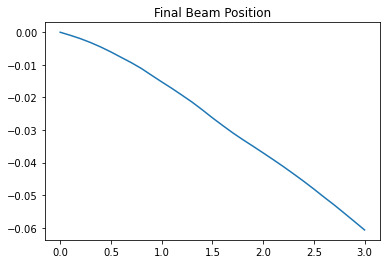

In [102]:
'''Control simulation'''
t_total = 3
dt = 3E-4
n_iterations = int(np.ceil(t_total/dt))

for time_step in range(n_iterations):
    beam_case.step(dt)
    r, = beam_case.get_state('r')
    

plt.plot(r[2], r[0])
plt.title('Final Beam Position')

# x = np.linspace(0,3,100)
# def y(x):
#     y = 3.*force*x/(4*np.pi*rad*rad*G) + force*tot_length*x**2/(2*E*I[0]) - force*x**3/(6*E*I[0])
#     return y
# plt.figure()
# plt.plot(x, y(x))

Text(0.5, 1.0, 'Theoretical Beam Position')

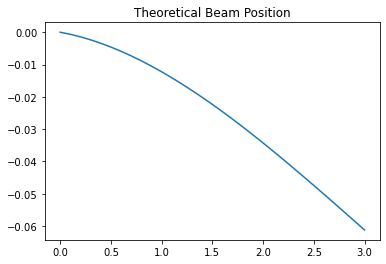

In [103]:
x = np.linspace(0,3,100)
def y(x):
    y = 3.*force*x/(4*np.pi*rad*rad*G) + force*tot_length*x**2/(2*E*I[0]) - force*x**3/(6*E*I[0])
    return y
plt.plot(x, y(x))
plt.title('Theoretical Beam Position')